In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm


DATADIR = "E:/fyp_stuff/cars"
CATEGORIES = ["cultus", "swift"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

<Figure size 640x480 with 1 Axes>

In [9]:
print(img_array)

[[41 41 42 ... 59 58 58]
 [44 44 44 ... 60 60 59]
 [45 45 44 ... 61 61 61]
 ...
 [43 43 43 ... 60 60 60]
 [41 41 40 ... 58 58 58]
 [39 39 38 ... 58 57 57]]


In [10]:
print(img_array.shape)

(360, 640)


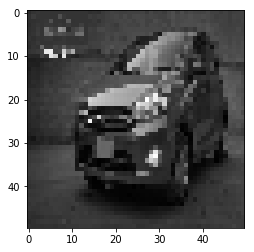

In [11]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

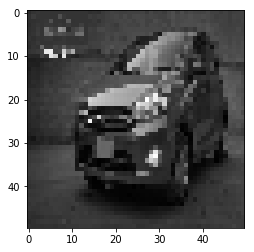

In [12]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [13]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do cultus and swift

        path = os.path.join(DATADIR,category)  # create path to cultus and swift
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=cultus 1=swift

        for img in tqdm(os.listdir(path)):  # iterate over each image per cultus and swift
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████████| 218/218 [00:16<00:00, 13.08it/s]


436


In [14]:
import random

random.shuffle(training_data)

In [17]:
from IPython.display import display
from PIL import Image

for sample in training_data[:10]:
    print(sample[1])
    
display(Image.open)
plt.show()

1
0
0
1
0
0
0
0
1
1


<function PIL.Image.open(fp, mode='r')>

In [18]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[247]
   [251]
   [251]
   ...
   [250]
   [254]
   [255]]

  [[248]
   [249]
   [249]
   ...
   [247]
   [254]
   [255]]

  [[234]
   [248]
   [249]
   ...
   [254]
   [252]
   [252]]

  ...

  [[ 85]
   [ 69]
   [ 76]
   ...
   [170]
   [169]
   [175]]

  [[ 71]
   [ 69]
   [ 66]
   ...
   [157]
   [157]
   [159]]

  [[ 81]
   [ 86]
   [ 73]
   ...
   [163]
   [161]
   [166]]]]


In [19]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [20]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

In [21]:
X[1]

array([[[166],
        [163],
        [159],
        ...,
        [139],
        [140],
        [140]],

       [[161],
        [156],
        [152],
        ...,
        [145],
        [147],
        [149]],

       [[152],
        [152],
        [147],
        ...,
        [147],
        [148],
        [146]],

       ...,

       [[129],
        [179],
        [161],
        ...,
        [107],
        [ 96],
        [ 95]],

       [[152],
        [165],
        [140],
        ...,
        [120],
        [101],
        [101]],

       [[125],
        [154],
        [159],
        ...,
        [107],
        [124],
        [133]]], dtype=uint8)